In [1]:
import os
import sys

# Add src directory to Python path
sys.path.append(os.path.join("..", "src"))

In [2]:
from pathlib import Path
from dataloader import Dataloader

import matplotlib.pyplot as plt

In [3]:
# Configure loader with the desired sampling rate and channel names
dataloader = Dataloader(sampling_rate=256.0)

In [4]:
# Specify the path to your EEG data file and load it into the loader.
datapath = Path("../data/raw/curry2.txt")

# Load, dropping columns if necessary
raw_arr = dataloader.load_data(
    filepath=datapath,
    delimeter='\t',
    header=None,
    drop_columns=[11]
)

In [5]:
# Create MNE Raw object
raw = dataloader.create_mne_raw(ch_types="eeg", montage="standard_1020")

In [6]:
# Let's look at the MNE-Raw metadata
n_channels = raw.info['nchan']
sfreq = raw.info['sfreq']
ch_names = raw.info['ch_names']

print(f"Number of channels: {n_channels}")
print(f"Sampling frequency: {sfreq} Hz")
print(f"Channel names: {ch_names}")

Number of channels: 18
Sampling frequency: 256.0 Hz
Channel names: ['C3', 'C4', 'O1', 'O2', 'Cz', 'F3', 'F4', 'F7', 'F8', 'Fp1', 'Fp2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']


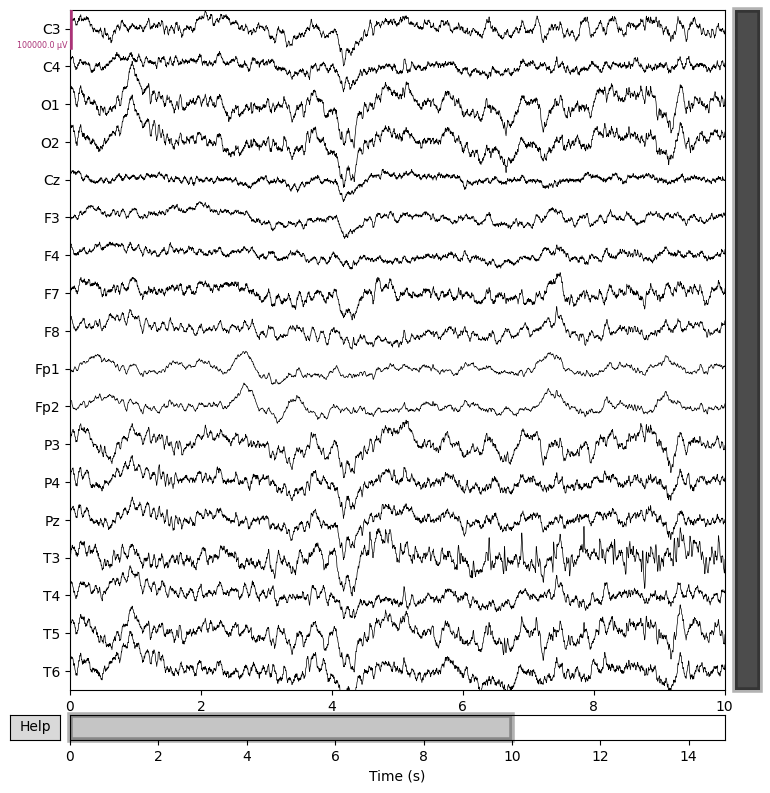

In [7]:
# Plot a 5-second segment of all channels
raw.plot(n_channels=n_channels, duration=10.0, show=False, scalings=0.05);

In [8]:
# Extract basic data
data, times = raw.get_data(return_times=True)
print(f"Data shape: {data.shape}")
print(f"Times shape: {times.shape}")

Data shape: (18, 3794)
Times shape: (3794,)


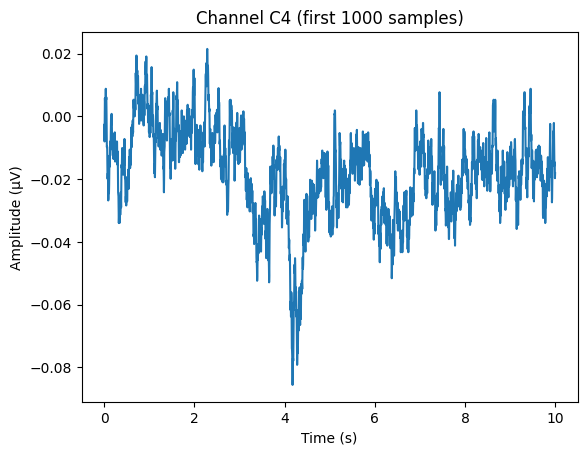

In [17]:
demo_channel = 1
plt.figure()
plt.plot(times[:2560], data[demo_channel, :2560])
plt.title(f"Channel {ch_names[demo_channel]} (first 1000 samples)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.show()